In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [121]:
# prompt: want to extract zip file loan_data.zip

!unzip loan_data.zip


Archive:  loan_data.zip
replace loan_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: loan_data.csv           


In [122]:
df = pd.read_csv('loan_data.csv')

In [123]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [124]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [125]:
df.isnull().any()

,0
person_age,False
person_gender,False
person_education,False
person_income,False
person_emp_exp,False
person_home_ownership,False
loan_amnt,False
loan_intent,False
loan_int_rate,False
loan_percent_income,False


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [127]:
numerical_col = []
for feature in df:
  if df[feature].dtype in ('float64','int64'):
   numerical_col.append(feature)

In [128]:
numerical_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [129]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


<Axes: >

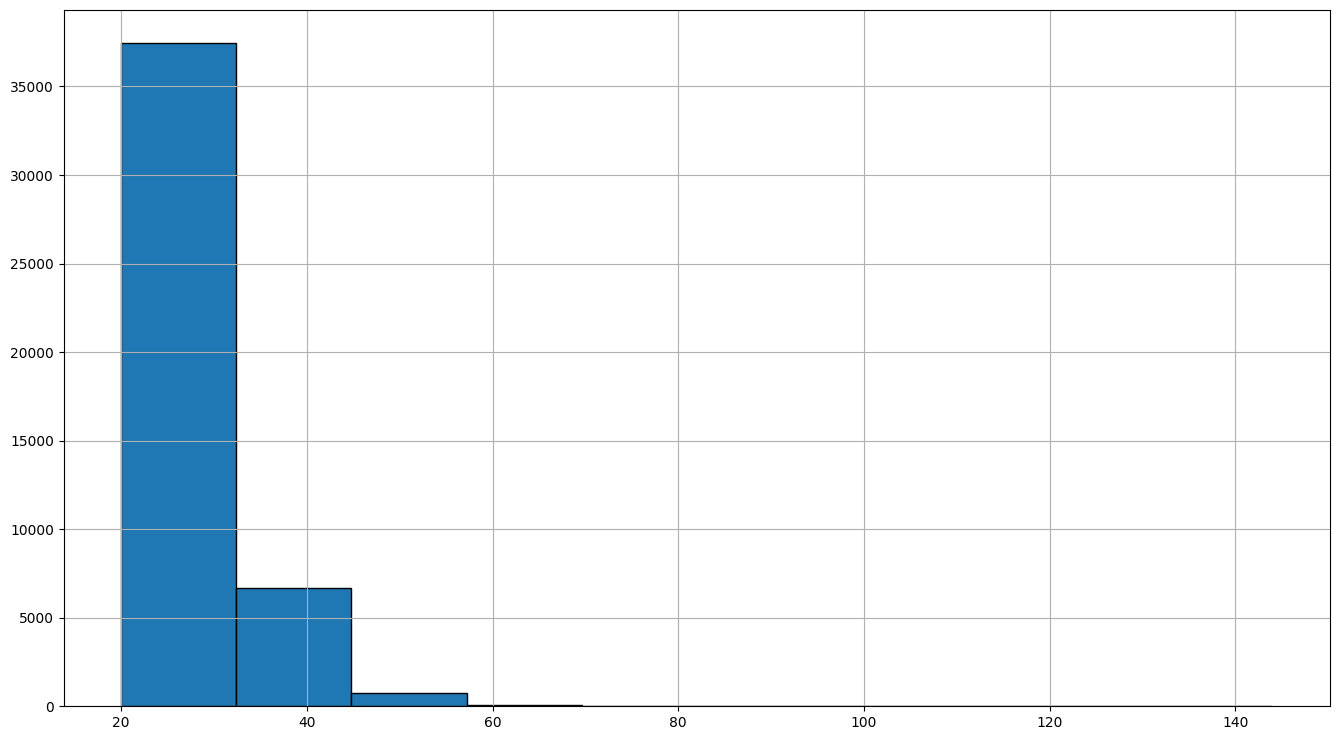

In [130]:
df['person_age'].hist(edgecolor = 'black')

In [131]:
df['loan_status'].value_counts() * 100 / len(df)

,count
loan_status,
0,77.777778
1,22.222222


In [132]:
print('Max Age is:' + str(df['person_age'].max()) +  ' Min Age is:' + str(df['person_age'].min()))

Max Age is:144.0 Min Age is:20.0


In [133]:
df[df['person_age'] == 144]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0


In [134]:
median_age = df['person_age'].median()
df.loc[df['person_age']>100,'person_age'] = median_age

In [135]:
print('Max Age is:' + str(df['person_age'].max()) +  ' Min Age is:' + str(df['person_age'].min()))

Max Age is:94.0 Min Age is:20.0


In [136]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [137]:
df['person_gender'] = df['person_gender'].map({'male':0, 'female': 1})

In [138]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [139]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [140]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [141]:
df = pd.get_dummies(df, columns=['person_education', 'person_home_ownership', 'loan_intent'], drop_first=True)



In [142]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No':0, 'Yes':1})

In [143]:
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,1,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,False,False,False,False,True,False,False,True,False,False
4,24.0,0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,False,True,False,False,True,False,False,True,False,False


In [144]:
bool_columns = df.select_dtypes(include='bool').columns

# Convert all boolean columns to 1/0
df[bool_columns] = df[bool_columns].astype(int)




In [145]:
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,1,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,1,0,0,1,0,0,0,1,0
1,21.0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,1,0,0,1,0,1,0,0,0,0
2,25.0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,0,0,0,0,0,1,0,0
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,0,0,0,1,0,0,1,0,0
4,24.0,0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,1,0,0,1,0,0,1,0,0


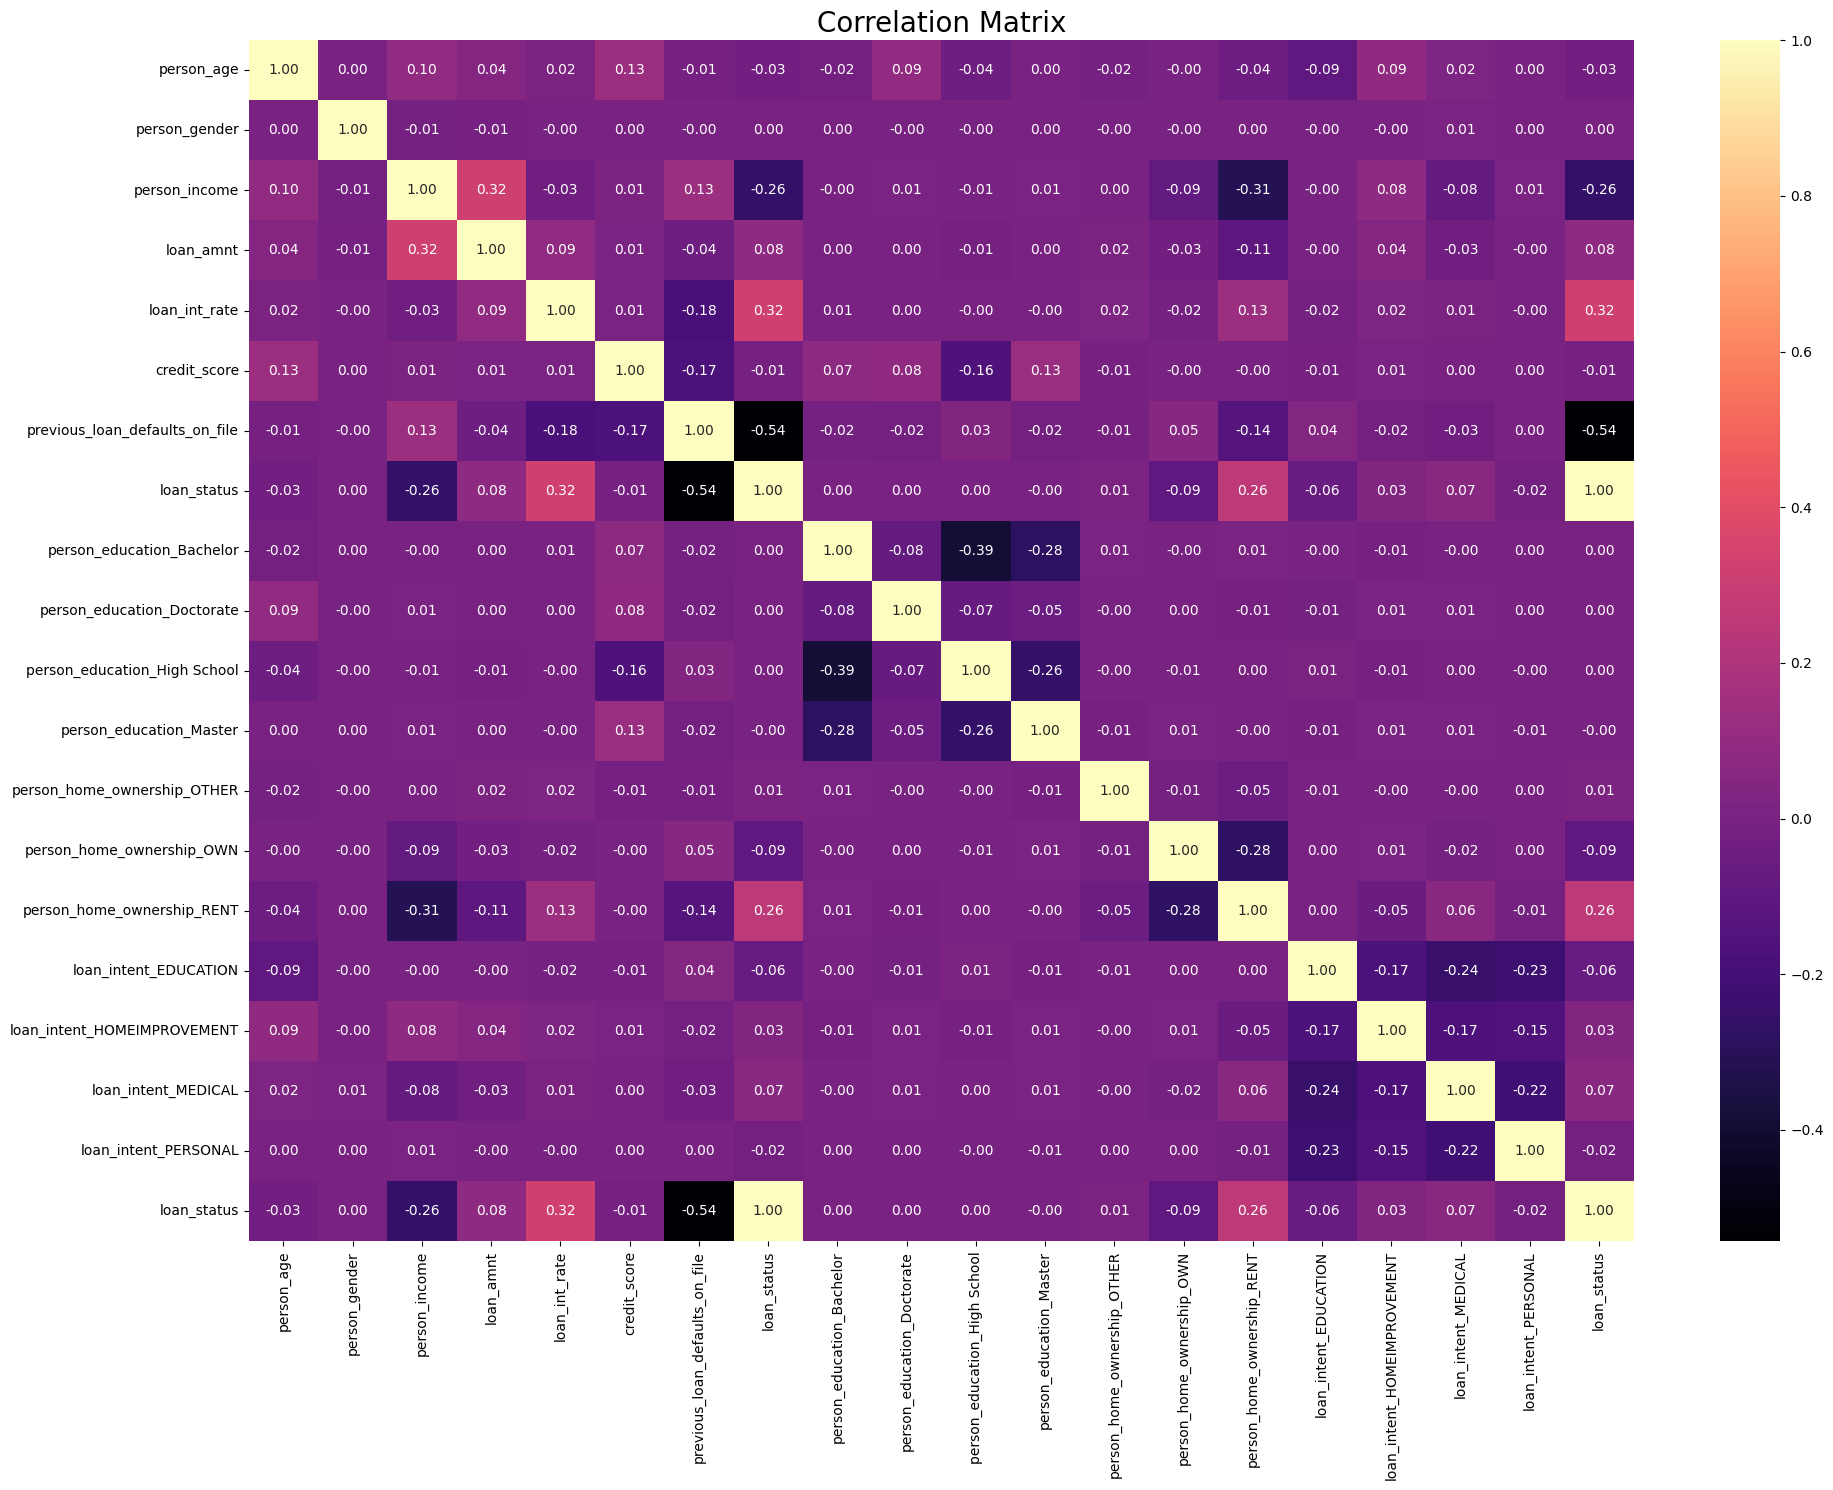

In [204]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [147]:
for i in range(len(df.columns)):
  for j in range(i+1,len(df.columns)):
    if df[df.columns[i]].corr(df[df.columns[j]]) > 0.5:
     print("Remove either " + str(df.columns[i] + " or " + str(df.columns[j])))

Remove either person_age or person_emp_exp
Remove either person_age or cb_person_cred_hist_length
Remove either person_emp_exp or cb_person_cred_hist_length
Remove either loan_amnt or loan_percent_income


In [148]:
df.drop(['person_emp_exp','cb_person_cred_hist_length','loan_percent_income'], axis = 1, inplace = True)

In [149]:
numerical_col = df.columns.intersection(numerical_col)
numerical_col

Index(['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
       'credit_score', 'loan_status'],
      dtype='object')

In [150]:
df.columns

Index(['person_age', 'person_gender', 'person_income', 'loan_amnt',
       'loan_int_rate', 'credit_score', 'previous_loan_defaults_on_file',
       'loan_status', 'person_education_Bachelor',
       'person_education_Doctorate', 'person_education_High School',
       'person_education_Master', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

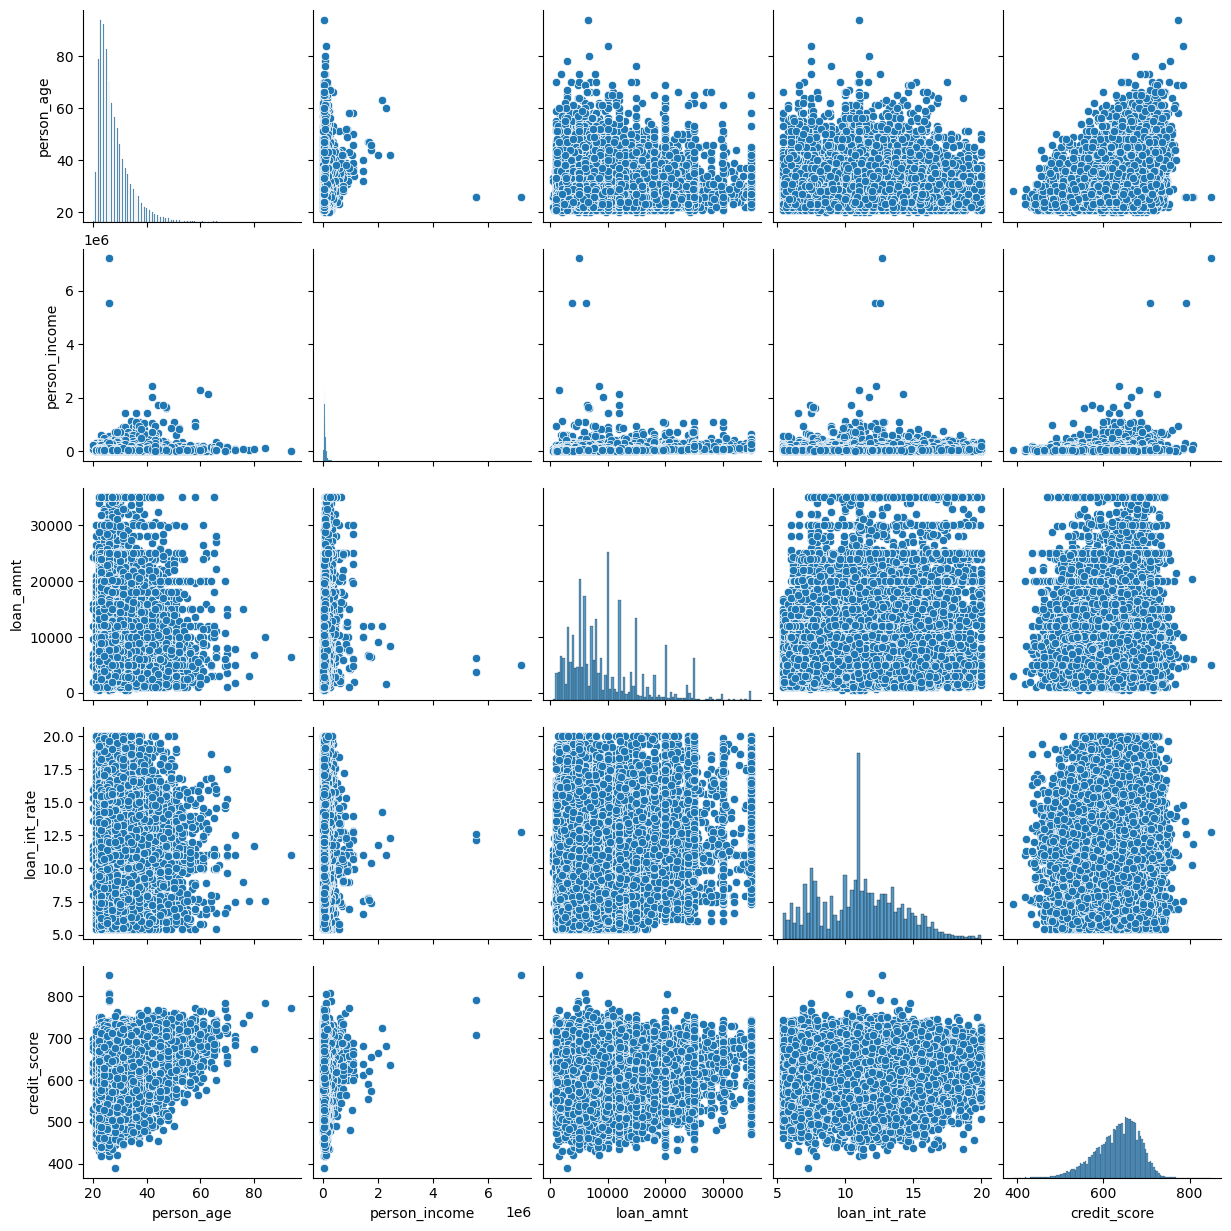

In [151]:
import seaborn as sns
#pairplot
mean_col = ['person_age','person_income','loan_amnt','loan_int_rate','credit_score']
sns.pairplot(df[mean_col])


In [152]:
outlier_col = []
for feature in numerical_col:
  if feature != 'loan_status':
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    has_outliers = ((df[feature] < lower) | (df[feature] > upper)).any()
    if has_outliers:
          outlier_col.append(feature)
    else:
          print(feature, "no")



In [153]:
outlier_col

['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'credit_score']

In [154]:
  for feature in outlier_col:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df.loc[df[feature]<=lower,feature] = np.mean(df[feature])
    df.loc[df[feature]>upper, feature] = np.mean(df[feature])


<ipython-input-154-f61a73cd848c>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '632.6087555555556' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature]<=lower,feature] = np.mean(df[feature])


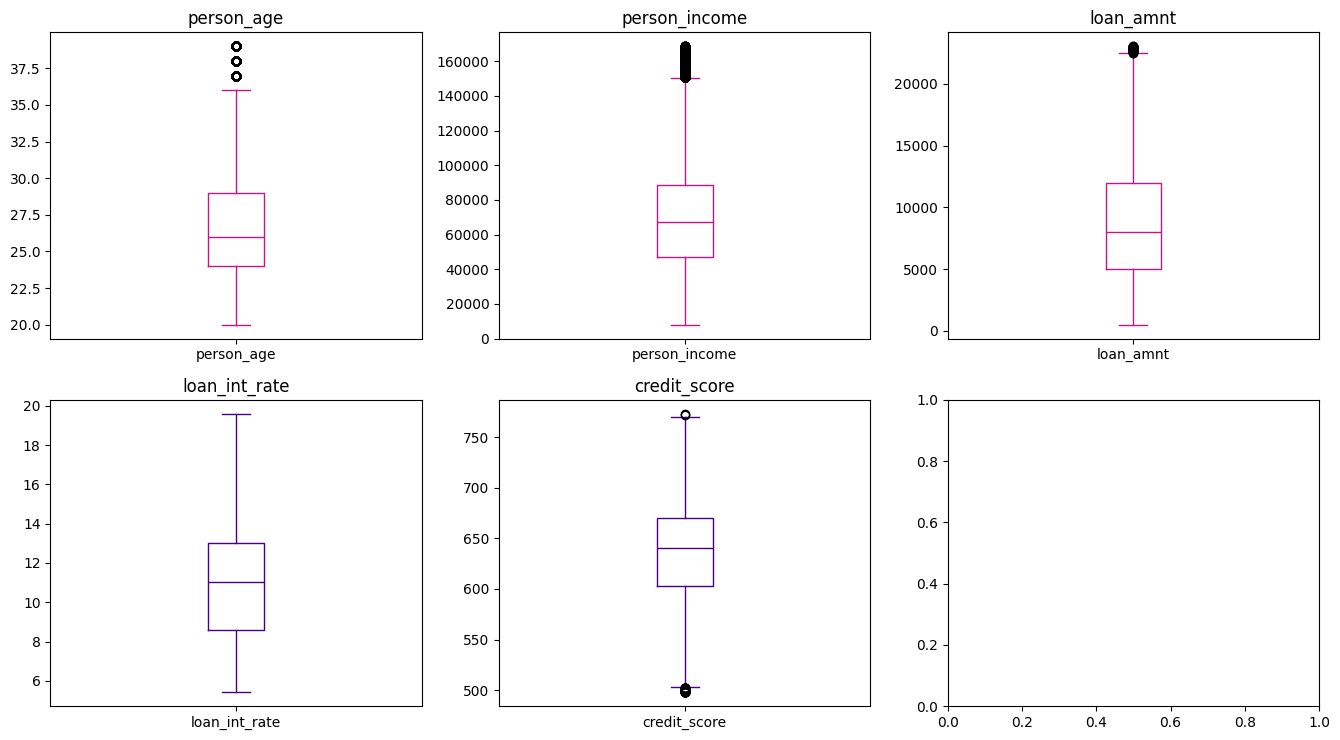

In [158]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, (len(outlier_col)+1)//2)
for i,feature in enumerate(outlier_col):
  if i < ((len(outlier_col)+1)//2) :
   df[feature].plot.box(title=feature,ax=axis[0][i],color="MEDIUMVIOLETRED")
  else:
   df[feature].plot.box(title = feature, ax = axis[1][i -((len(numerical_col)+1)//2)], color = "INDIGO")


In [159]:
Y = df["loan_status"]
X = df.iloc[:,:-1]


In [160]:
Y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [161]:
X

,person_age,person_gender,person_income,loan_amnt,loan_int_rate,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
0,22.0,1,71948.0,9583.157556,16.02,561.0,0,1,0,0,0,1,0,0,1,0,0,0,1
1,21.0,1,12282.0,1000.000000,11.14,504.0,1,0,0,0,1,0,0,1,0,1,0,0,0
2,25.0,1,12438.0,5500.000000,12.87,635.0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,23.0,1,79753.0,9583.157556,15.23,675.0,0,1,1,0,0,0,0,0,1,0,0,1,0
4,24.0,0,66135.0,9583.157556,14.27,586.0,0,1,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,47971.0,15000.000000,15.66,645.0,0,1,0,0,0,0,0,0,1,0,0,1,0
44996,37.0,1,65800.0,9000.000000,14.07,621.0,0,1,0,0,0,0,0,0,1,0,1,0,0
44997,33.0,0,56942.0,2771.000000,10.02,668.0,0,1,0,0,0,0,0,0,1,0,0,0,0
44998,29.0,0,33164.0,12000.000000,13.23,604.0,0,1,1,0,0,0,0,0,1,1,0,0,0


In [162]:
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler class from sklearn.preprocessing

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [165]:
df = pd.concat([X_scaled,Y], axis = 1)

In [166]:
df

,person_age,person_gender,person_income,loan_amnt,loan_int_rate,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_status
0,-1.170099,1.110069,0.019717,0.179928,1.712649,-1.529635,-1.016040,1.870829,-0.651157,-0.118292,-0.602063,2.333879,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,-0.484252,2.226811,1
1,-1.409023,1.110069,-1.862086,-1.580945,0.053704,-2.721269,0.984213,-0.534522,-0.651157,-0.118292,1.660955,-0.428471,-0.051057,3.774794,-1.042827,1.978995,-0.344862,-0.484252,-0.449073,0
2,-0.453328,1.110069,-1.857166,-0.657750,0.641813,0.017399,-1.016040,1.870829,-0.651157,-0.118292,1.660955,-0.428471,-0.051057,-0.264915,-1.042827,-0.505307,-0.344862,2.065040,-0.449073,1
3,-0.931176,1.110069,0.265879,0.179928,1.444090,0.853634,-1.016040,1.870829,1.535728,-0.118292,-0.602063,-0.428471,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,2.065040,-0.449073,1
4,-0.692252,-0.900845,-0.163619,0.179928,1.117740,-1.006988,-1.016040,1.870829,-0.651157,-0.118292,-0.602063,2.333879,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,2.065040,-0.449073,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.024520,-0.900845,-0.736492,1.291217,1.590268,0.226458,-1.016040,1.870829,-0.651157,-0.118292,-0.602063,-0.428471,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,2.065040,-0.449073,1
44996,2.413760,1.110069,-0.174184,0.060290,1.049751,-0.275283,-1.016040,1.870829,-0.651157,-0.118292,-0.602063,-0.428471,-0.051057,-0.264915,0.958931,-0.505307,2.899711,-0.484252,-0.449073,1
44997,1.458064,-0.900845,-0.453556,-1.217617,-0.327038,0.707293,-1.016040,1.870829,-0.651157,-0.118292,-0.602063,-0.428471,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,-0.484252,-0.449073,1
44998,0.502368,-0.900845,-1.203489,0.675754,0.764195,-0.630683,-1.016040,1.870829,1.535728,-0.118292,-0.602063,-0.428471,-0.051057,-0.264915,0.958931,1.978995,-0.344862,-0.484252,-0.449073,1


In [167]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)


In [168]:
from sklearn import metrics
from sklearn.metrics import classification_report


In [169]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
target_names = ['non_fraud', 'fraud']
print(classification_report(Y_test, Y_pred, target_names=target_names))


              precision    recall  f1-score   support

   non_fraud       0.99      0.96      0.98     11938
       fraud       0.87      0.97      0.92      3362

    accuracy                           0.96     15300
   macro avg       0.93      0.96      0.95     15300
weighted avg       0.97      0.96      0.96     15300



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
target_names = ['non_fraud', 'fraud']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

   non_fraud       0.87      0.92      0.89     11938
       fraud       0.64      0.51      0.57      3362

    accuracy                           0.83     15300
   macro avg       0.75      0.71      0.73     15300
weighted avg       0.82      0.83      0.82     15300



In [176]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
target_names = ['non_fraud', 'fraud']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

   non_fraud       1.00      1.00      1.00     11938
       fraud       1.00      1.00      1.00      3362

    accuracy                           1.00     15300
   macro avg       1.00      1.00      1.00     15300
weighted avg       1.00      1.00      1.00     15300



In [174]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
target_names = ['non_fraud', 'fraud']
print(classification_report(Y_test, Y_pred, target_names=target_names))

KeyboardInterrupt: 

In [190]:
from sklearn.ensemble import GradientBoostingClassifier # Importing GradientBoostingClassifier from sklearn.ensemble
xgb = GradientBoostingClassifier(random_state = 12345)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
target_names = ['non_fraud', 'fraud']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

   non_fraud       1.00      1.00      1.00     11938
       fraud       1.00      1.00      1.00      3362

    accuracy                           1.00     15300
   macro avg       1.00      1.00      1.00     15300
weighted avg       1.00      1.00      1.00     15300



In [192]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X)
target_names = ['non_fraud', 'fraud']
print(classification_report(Y, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

   non_fraud       1.00      1.00      1.00     35000
       fraud       1.00      1.00      1.00     10000

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



In [193]:
df_new = pd.read_csv('/content/loan_data.csv')


In [194]:
Y_pred = pd.Series(Y_pred, name = 'loan_status_pred')

In [195]:
df_new = pd.concat([df_new, Y_pred], axis = 1)

In [196]:
df_new

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_status_pred
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,1


<Axes: title={'center': 'Predicted'}, xlabel='loan_int_rate', ylabel='credit_score'>

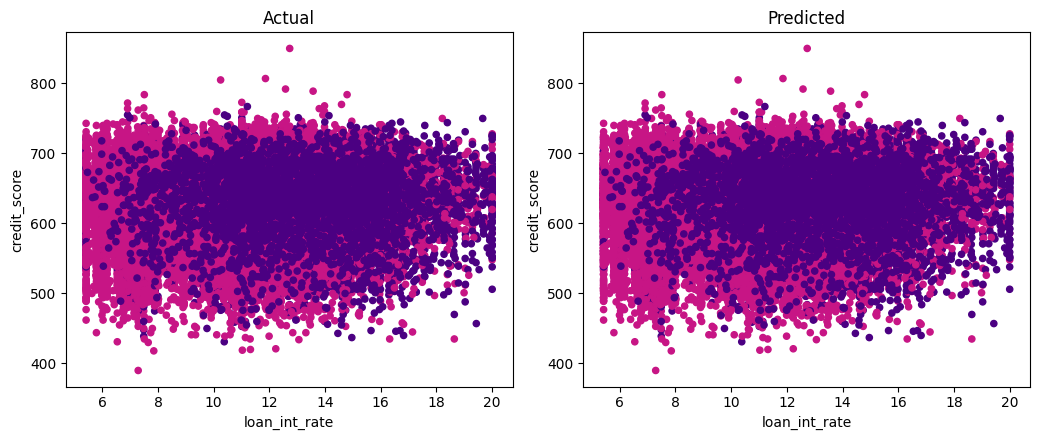

In [206]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}

df_new.plot.scatter("loan_int_rate","credit_score",title="Actual",ax=axis[0],c=df_new['loan_status'].map(colors))
df_new.plot.scatter("loan_int_rate","credit_score",title="Predicted",ax=axis[1],c=df_new['loan_status_pred'].map(colors))
